<a href="https://colab.research.google.com/github/jisoolee11/Deep-Learning/blob/main/MLschool/my_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>내 이미지 사용하기

In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [11]:
# 이미지 읽어서 데이터 준비하기
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[2] for i in range(len(paths))])
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [12]:
종속[0:10]

array(['F', 'H', 'G', 'G', 'E', 'C', 'D', 'C', 'E', 'E'], dtype='<U1')

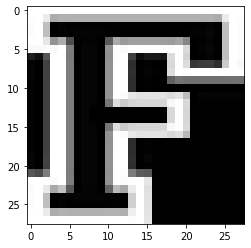

In [13]:
plt.imshow(독립[0], cmap='gray')

In [3]:
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [5]:
import tensorflow as tf

X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [6]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 13s 20ms/step - loss: 0.7919 - accuracy: 0.7583
Epoch 2/10
586/586 [==============================] - 12s 21ms/step - loss: 0.2784 - accuracy: 0.9158
Epoch 3/10
586/586 [==============================] - 12s 20ms/step - loss: 0.2069 - accuracy: 0.9380
Epoch 4/10
586/586 [==============================] - 12s 20ms/step - loss: 0.1706 - accuracy: 0.9476
Epoch 5/10
586/586 [==============================] - 12s 20ms/step - loss: 0.1386 - accuracy: 0.9556
Epoch 6/10
586/586 [==============================] - 12s 20ms/step - loss: 0.1209 - accuracy: 0.9638
Epoch 7/10
586/586 [==============================] - 12s 20ms/step - loss: 0.0980 - accuracy: 0.9678
Epoch 8/10
586/586 [==============================] - 12s 21ms/step - loss: 0.0786 - accuracy: 0.9732
Epoch 9/10
586/586 [==============================] - 12s 21ms/step - loss: 0.0685 - accuracy: 0.9772
Epoch 10/10
586/586 [==============================] - 13s 21ms/step - loss: 0.055